In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy.stats import percentileofscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as sk
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")

file_name = "suicidedataset.csv"
dataset = pd.read_csv(file_name)

dataset = dataset[dataset.year >= 1995] 
dataset= dataset[dataset.year <= 2013]
dataset.shape

(9984, 26)

In [101]:
dataset1=dataset.rename(columns={'Individuals using the Internet (% of population)':'Internetusers','Expense (% of GDP)':'Expenses',
                                 'Compensation of employees (% of expense)':'EmployeeCompensation','Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment',
                                 'Physicians (per 1,000 people)':'Physicians','Strength of legal rights index (0=weak to 12=strong)':'StrengthofLegalRightsIndex','Life expectancy at birth, total (years)':'LifeExpectancyatBirth',
                                'Mobile cellular subscriptions (per 100 people)':'MobileCellularSubscriptions','Refugee population by country or territory of origin':'Refugee',
                                'Contributing family workers, total (% of total employment) (modeled ILO estimate)':'ContributingFamilyWorkers','Access to electricity (% of population)':'AccesstoElectricity',
                                'Lower secondary completion rate, total (% of relevant age group)':'LowerSecondaryCompletionRate','Labor force, total':'LaborForce'})




In [102]:
dataset1.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physicians,StrengthofLegalRightsIndex,LaborForce,LifeExpectancyatBirth,MobileCellularSubscriptions,Refugee,ContributingFamilyWorkers,AccesstoElectricity,LowerSecondaryCompletionRate
120,Argentina,1995,male,75+ years,190,433800,43.80,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN
121,Argentina,1995,male,55-74 years,515,2214000,23.26,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN
122,Argentina,1995,male,35-54 years,485,3787800,12.80,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN
123,Argentina,1995,male,25-34 years,218,2404900,9.06,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN
124,Argentina,1995,male,15-24 years,277,3112100,8.90,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN


In [103]:
print(dataset1.isnull().sum())
print(dataset1.shape)

country                            0
year                               0
sex                                0
age                                0
suicides_no                        0
population                         0
suicidesper100k                    0
country-year                       0
yearlyHDI                       6432
GDPpyear                           0
GDPpcapital                        0
generation                         0
suicide%                           0
Internetusers                    108
Expenses                        1476
EmployeeCompensation            1572
Unemployment                       0
Physicians                      2328
StrengthofLegalRightsIndex      9492
LaborForce                         0
LifeExpectancyatBirth              0
MobileCellularSubscriptions        0
Refugee                          132
ContributingFamilyWorkers          0
AccesstoElectricity              468
LowerSecondaryCompletionRate    5568
dtype: int64
(9984, 26)


In [104]:
dataset1.drop('country-year',axis=1,inplace=True)  
dataset1.drop('yearlyHDI',axis=1,inplace=True)  
dataset1.drop('LowerSecondaryCompletionRate',axis=1,inplace=True)
dataset1.drop('Physicians',axis=1,inplace=True) 
dataset1.drop('StrengthofLegalRightsIndex',axis=1,inplace=True)
dataset1.isnull().sum()

country                           0
year                              0
sex                               0
age                               0
suicides_no                       0
population                        0
suicidesper100k                   0
GDPpyear                          0
GDPpcapital                       0
generation                        0
suicide%                          0
Internetusers                   108
Expenses                       1476
EmployeeCompensation           1572
Unemployment                      0
LaborForce                        0
LifeExpectancyatBirth             0
MobileCellularSubscriptions       0
Refugee                         132
ContributingFamilyWorkers         0
AccesstoElectricity             468
dtype: int64

In [105]:

dataset1.Internetusers.fillna(dataset1.Internetusers.min(), inplace=True)
dataset1.Refugee.fillna(dataset1.Refugee.min(),inplace=True)
dataset1.EmployeeCompensation.fillna(dataset1.EmployeeCompensation.mean(),inplace=True)
dataset1.Expenses.fillna(dataset1.Expenses.mean(),inplace=True)
dataset1.AccesstoElectricity.fillna(dataset1.AccesstoElectricity.mean(),inplace=True)


In [106]:
print(dataset1.isnull().any())
print(dataset1.shape)

country                        False
year                           False
sex                            False
age                            False
suicides_no                    False
population                     False
suicidesper100k                False
GDPpyear                       False
GDPpcapital                    False
generation                     False
suicide%                       False
Internetusers                  False
Expenses                       False
EmployeeCompensation           False
Unemployment                   False
LaborForce                     False
LifeExpectancyatBirth          False
MobileCellularSubscriptions    False
Refugee                        False
ContributingFamilyWorkers      False
AccesstoElectricity            False
dtype: bool
(9984, 21)


In [107]:
dataset1['risk']=dataset1.suicidesper100k.copy()
dataset1['risk']=np.where(dataset1.risk<dataset1.suicidesper100k.mean(),0,1)
print(dataset1.suicidesper100k.mean())

13.061019631410256


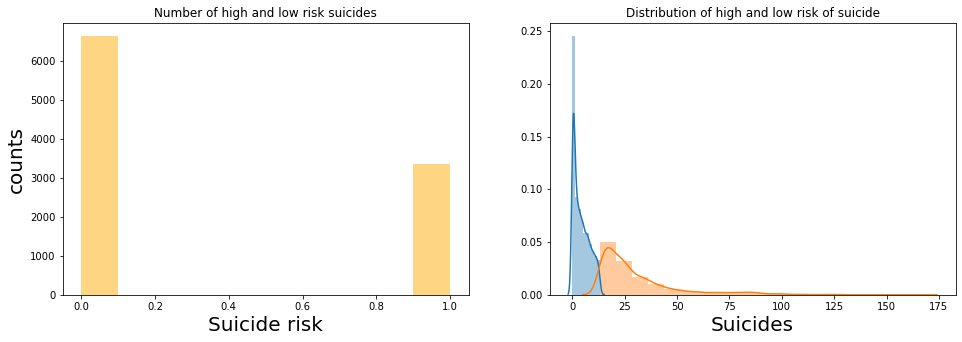

In [108]:
col = plt.cm.Spectral(np.linspace(0, 1, 22))
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(dataset1.risk, color=col[8])
plt.ylabel('counts', fontsize=20)
plt.xlabel('Suicide risk', fontsize=20)
plt.title("Number of high and low risk suicides")

plt.subplot(122)
sns.distplot(dataset1.suicidesper100k[dataset1.risk == 0], bins=10)
sns.distplot(dataset1.suicidesper100k[dataset1.risk == 1], bins=20)
plt.xlabel('Suicides', fontsize=20)
plt.title("Distribution of high and low risk of suicide")
plt.show()

In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset1.country=le.fit_transform(dataset1.country)
dataset1.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [110]:
dataset1.sex=le.fit_transform(dataset1.sex)

In [111]:
dataset1.age=le.fit_transform(dataset1.age)

In [112]:
dataset1.generation=le.fit_transform(dataset1.generation)

In [113]:
totalfeatures=['country','age','year','sex','population','GDPpyear','GDPpcapital','generation','Internetusers','Expenses','EmployeeCompensation','Unemployment','LaborForce','LifeExpectancyatBirth','MobileCellularSubscriptions','Refugee','ContributingFamilyWorkers','AccesstoElectricity']
X=dataset1[totalfeatures]
y=dataset1['risk']

In [114]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=4)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7488, 18) (7488,)
(2496, 18) (2496,)


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report


LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train, y_train)

yLRhat = LR.predict(X_test)

yLRhat_prob = LR.predict_proba(X_test)


print('precision_recall_fscore_support', precision_recall_fscore_support(y_test, yLRhat, average='weighted'))

cm = confusion_matrix(y_test, yLRhat)
print('\n confusion matrix \n', cm)

print('classification report for Logistic Regression\n', classification_report(y_test, yLRhat))

precision_recall_fscore_support (0.7835864078357442, 0.7772435897435898, 0.7795613207988072, None)

 confusion matrix 
 [[1332  319]
 [ 237  608]]
classification report for Logistic Regression
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1651
           1       0.66      0.72      0.69       845

    accuracy                           0.78      2496
   macro avg       0.75      0.76      0.76      2496
weighted avg       0.78      0.78      0.78      2496



In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


DT = DecisionTreeClassifier(criterion="entropy", max_depth=7, max_leaf_nodes=30)
DT = DT.fit(X_train, y_train)
ydthat = DT.predict(X_test)

print('******************Decision Tree classifier**************')

print('Accuracy =', DT.score(X_test, y_test))
print('Train Accuracy=', DT.score(X_train, y_train))
print('CM\n', confusion_matrix(y_test, ydthat))
print('classification report for decision tree\n', classification_report(y_test, ydthat))
print('# of leaves', DT.get_n_leaves(), '\n Depth', DT.get_depth())


DTfeat_importance = DT.feature_importances_
DTfeat_importance = pd.DataFrame([totalfeatures, DT.feature_importances_]).T


print(DTfeat_importance.sort_values(by=1, ascending=False))
print('\n# of features= ', DT.n_features_)

******************Decision Tree classifier**************
Accuracy = 0.8846153846153846
Train Accuracy= 0.8842147435897436
CM
 [[1517  134]
 [ 154  691]]
classification report for decision tree
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      1651
           1       0.84      0.82      0.83       845

    accuracy                           0.88      2496
   macro avg       0.87      0.87      0.87      2496
weighted avg       0.88      0.88      0.88      2496

# of leaves 30 
 Depth 7
                              0           1
3                           sex    0.342282
1                           age    0.289393
10         EmployeeCompensation   0.0684822
17          AccesstoElectricity    0.060771
9                      Expenses    0.038627
16    ContributingFamilyWorkers   0.0382108
0                       country   0.0325598
15                      Refugee   0.0279882
13        LifeExpectancyatBirth   0.0243942
12            

In [118]:
DTfeat_importance.columns=['feature','degree of importance']
DTfeat_importance

,feature,degree of importance
0,country,0.0325598
1,age,0.289393
2,year,0
3,sex,0.342282
4,population,0.0121962
5,GDPpyear,0
6,GDPpcapital,0
7,generation,0.0208894
8,Internetusers,0
9,Expenses,0.038627


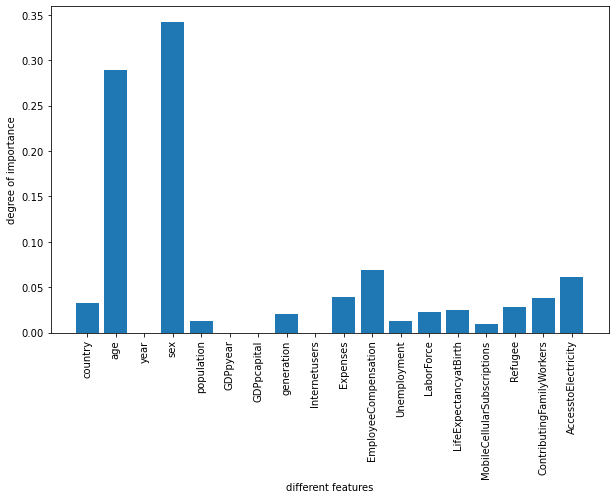

In [119]:
plt.figure(figsize=(10,6))
x_feature=DTfeat_importance['feature']
y_degree_of_importance=DTfeat_importance['degree of importance']
plt.bar(x_feature, y_degree_of_importance, label="visualization")
plt.xticks(rotation=90)
plt.xlabel('different features')
plt.ylabel('degree of importance')
plt.show()

In [120]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=64,random_state=0
                                    , max_depth=10
                                    , min_samples_split=2
                                    , min_samples_leaf=5
                                    ,max_leaf_nodes=20
                                 , max_features=len(totalfeatures)) 

random_forest.fit(X_train, y_train)

RFpre = random_forest.predict(X_test)
feat_importance = random_forest.feature_importances_
feature_importance = pd.DataFrame([totalfeatures, random_forest.feature_importances_]).T

print(random_forest.score(X_train, y_train))
print(random_forest.score(X_test, y_test))
print(confusion_matrix(y_test, RFpre))
print(classification_report(y_test, RFpre))
print(feature_importance.sort_values(by=1, ascending=False))

0.9129273504273504
0.90625
[[1500  151]
 [  83  762]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1651
           1       0.83      0.90      0.87       845

    accuracy                           0.91      2496
   macro avg       0.89      0.91      0.90      2496
weighted avg       0.91      0.91      0.91      2496

                              0            1
3                           sex     0.394457
1                           age     0.294164
17          AccesstoElectricity      0.08777
16    ContributingFamilyWorkers    0.0514633
0                       country    0.0365841
10         EmployeeCompensation    0.0325856
15                      Refugee    0.0243805
9                      Expenses    0.0226796
13        LifeExpectancyatBirth    0.0194322
12                   LaborForce    0.0113706
4                    population   0.00826431
7                    generation   0.00660976
5                      GDPpyear   

In [121]:
feature_importance.columns=['feature','degree of importance']
feature_importance

,feature,degree of importance
0,country,0.0365841
1,age,0.294164
2,year,0.000829907
3,sex,0.394457
4,population,0.00826431
5,GDPpyear,0.00318298
6,GDPpcapital,0.000981908
7,generation,0.00660976
8,Internetusers,0.00165933
9,Expenses,0.0226796


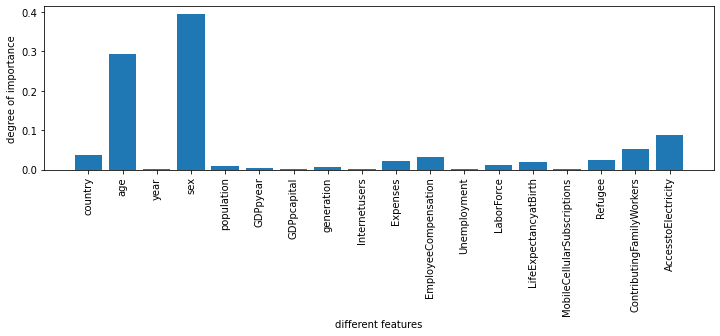

In [122]:
plt.figure(figsize=(12,3))
x_feature=feature_importance['feature']
y_degree_of_importance=feature_importance['degree of importance']
plt.bar(x_feature, y_degree_of_importance, label="visualization")
plt.xticks(rotation=90)
plt.xlabel('different features')
plt.ylabel('degree of importance')
plt.show()